In [2]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.corpora import Dictionary
from stop_words import get_stop_words
from wordcloud import WordCloud
from gensim.models import Phrases
from pprint import pprint
from gensim.models import LdaModel
from gensim.models import HdpModel
import gensim
import copy
import csv
from datetime import datetime
import pyLDAvis.gensim as gensimvis
import pyLDAvis

In [3]:
model =  LdaModel.load('reddit_autism_pass3_topic10_lda.model')
#hdp =  HdpModel.load('reddit_autism_hdp.model')

10


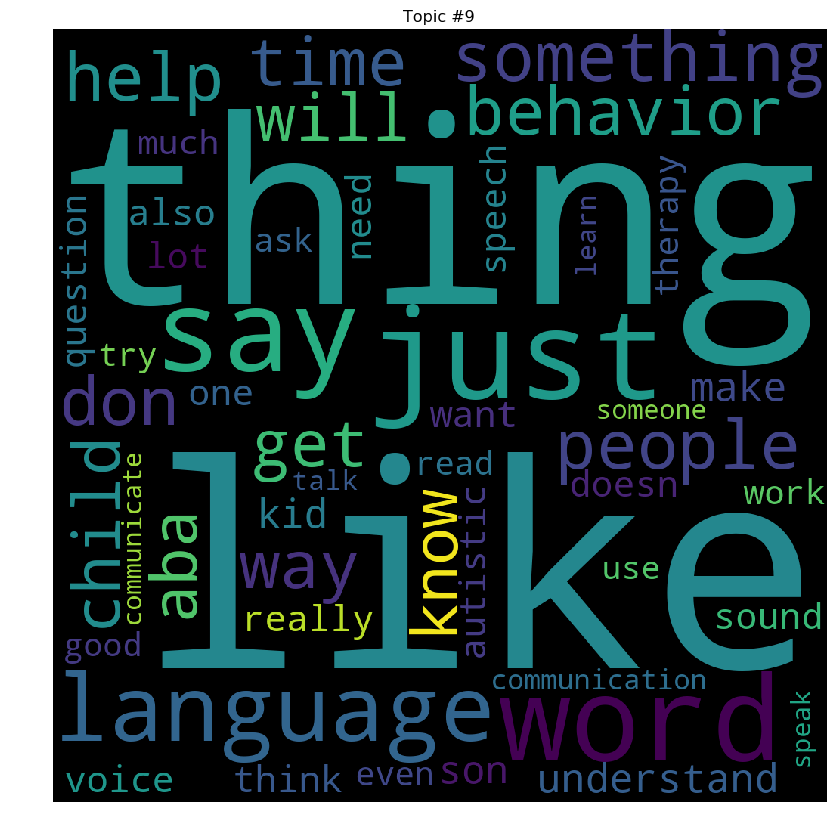

In [60]:
import matplotlib.pyplot as plt
print(model.num_topics)
my_dpi = 96
plt.figure(figsize=(1024/my_dpi, 1024/my_dpi), dpi=my_dpi)
for t in range(model.num_topics):
    list = model.show_topic(t, 50)
    dict = {}
    for word in list:
        (key, value) = word
        dict[key] = value
    plt.imshow(WordCloud(width=1024, height=1024).generate_from_frequencies(dict))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    #plt.show()
    plt.savefig("WordCloud/Topic #" + str(t))

In [4]:
docs = []
with open('output/post_comment_after_bigram.csv') as csvLayerFile:
    csvReader = csv.reader(csvLayerFile)
    for row in csvReader:
        doc = []
        for item in row:
            doc.append(item.replace("'","").lstrip())
        docs.append(doc)
print(docs[14787])
single_doc = []
single_doc.append(docs[14787])
single_doc.append(docs[14786])
print (single_doc)

['anyone', 'else', 'get', 'bit', 'annoyed', 'inspirational', 'video', 'shared', 'everywhere', 'see', 'autistic', 'child', 'person', 'xyz', 'talented', 'touching', 'thing', 'won', 'believe', 'heart', 'will', 'melt', 'etc', 'think', 'u', 'seen', 'clickbaity', 'thing', 'may', 'legitimately', 'talented', 'touching', 'heart', 'warming', 'time', 'kind', 'feel', 'like', 'stereotyped', 'paraded', 'around', 'like', 'dog', 'pony', 'show', 'social', 'medium', 'similar', 'fashion', 'medium', 'done', 'marginalized', 'group', 'realize', 'video', 'also', 'help', 'humanize', 'autistic', 'community', 'rest', 'world', 'build', 'certain', 'base', 'level', 'awareness', 'complaining', 'probably', 'won', 'change', 'still', 'feel', 'bit', 'icky', 'cheap', 'anyone', 'else', 'kind', 'feel', 'realize', 'video', 'also', 'help', 'humanize', 'autistic', 'community', 'rest', 'world', 'really', 'don', 'people', 'watch', 'video', 'feel', 'warm', 'inside', 'minute', 'move', 'along', 'without', 'giving', 'actual', 'tho

In [5]:
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.6)

In [6]:
# Vectorize data.

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [13]:
id2word = dictionary.id2token
model = LdaModel(corpus, num_topics=5, id2word = id2word, passes=2)

ValueError: cannot compute LDA over an empty collection (no terms)

In [6]:
hdp.print_topics(num_topics=200, num_words=10)

[(0,
  '0.013*people + 0.012*like + 0.011*just + 0.009*don + 0.007*thing + 0.007*get + 0.006*think + 0.006*know + 0.006*one + 0.006*time'),
 (1,
  '0.011*like + 0.010*people + 0.010*just + 0.008*don + 0.007*autism + 0.007*get + 0.007*know + 0.006*thing + 0.006*time + 0.006*one'),
 (2,
  '0.007*like + 0.006*autism + 0.006*people + 0.004*thing + 0.004*just + 0.004*don + 0.004*think + 0.003*get + 0.003*one + 0.003*aba'),
 (3,
  '0.006*like + 0.005*just + 0.005*people + 0.005*don + 0.004*get + 0.004*animal + 0.003*thing + 0.003*know + 0.003*think + 0.003*one'),
 (4,
  '0.007*like + 0.005*just + 0.004*people + 0.004*thing + 0.004*get + 0.004*don + 0.003*really + 0.003*autism + 0.003*think + 0.003*know'),
 (5,
  '0.006*like + 0.005*just + 0.004*people + 0.003*sex + 0.003*thing + 0.003*know + 0.003*don + 0.003*get + 0.003*really + 0.003*think'),
 (6,
  '0.006*autism + 0.004*people + 0.003*aspergers + 0.003*spectrum + 0.002*diagnosis + 0.002*asperger + 0.002*autistic + 0.002*need + 0.002*think

In [7]:
#vis_data = gensimvis.prepare(hdp, corpus, dictionary)
#pyLDAvis.display(vis_data)

/home/hossaim3/.venvDatamining/lib/python3.5/site-packages/pyLDAvis/gensim.py:43: RuntimeWarning: invalid value encountered in true_divide
  doc_topic_dists = gamma / gamma.sum(axis=1)[:, None]


ValidationError: 
 * Not all rows (distributions) in doc_topic_dists sum to 1.

In [7]:
vis_data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(vis_data)

/home/hossaim3/.venvDatamining/lib/python3.5/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
